# DataCamp - Data Scientist Career Track (Python)

##    Statistical Thinking in Python (Part 2)               


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Statistical Thinking in Python (Part 2)/"

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
sns.set()

##    CHAPTER 1  - Parameter estimation by optimization


#### Exercício 1 - Optimal parameters

In [4]:
#vídeo
# se queremos testar a normalidade de dados, p ex, como a experiência da velocidade da luz, os parâmetros ótimos são os dos dados
# encontrar os parâmetros ótimos nem sempre é tão fácil como calcular a média e desvio-padrão dos dados

# Packages to do statistical inference:
# scipy.stats
# statsmodels
# aqui, no entanto, vamos focar-nos em "hacker statistics", com numpy

Exercício 2

In [5]:
# How often do we get no-hitters?

# number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball 
nohitter_times = [843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545, 715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,        876,  381,  905,  156,  419,  239,  119,  129,  467]

# If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed.
# the Exponential distribution has a single parameter, which we will call τ, the typical interval time. 
# The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time 
# (where time is in units of number of games) between no-hitters.

# ----> Compute the value of this parameter **from** the data. 
# ----> Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times 
# from an  ** exponential distribution**   with the τ you found and plot the histogram as an *approximation* to the PDF.

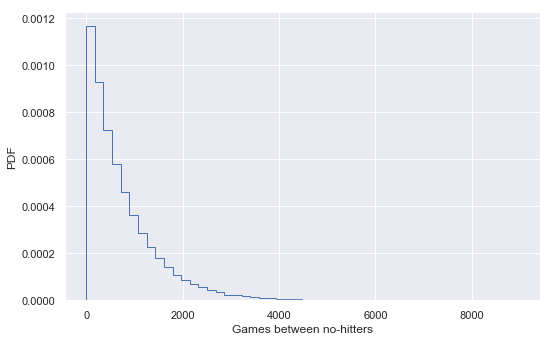

In [6]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes (bins=50)
_ = plt.hist(inter_nohitter_time, bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()
# Nice work! We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

Exercício 3

In [7]:
# Do the data follow our story?

# You have modeled no-hitters using an Exponential distribution. 
# Create an ECDF **of the real data**. Overlay the theoretical CDF with the ECDF from the data. 
# This helps you to verify that the Exponential distribution describes the observed data. 
# (a ECDF é melhor pq não sofre do bin bias)

# Bring the previous constructed ECDF function

def ecdf(data):
    """Compute ECDF for a **one-dimensional** array of measurements."""

    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, len(data) + 1) / len(data)

    return x, y

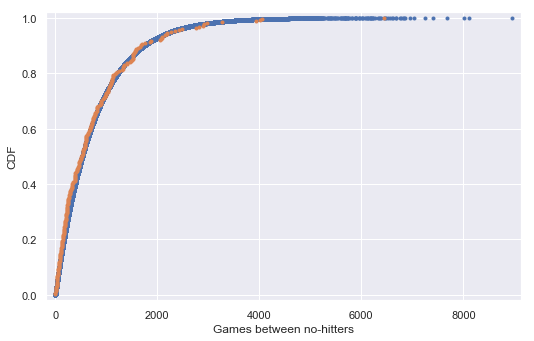

In [8]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor, marker='.', linestyle='none')
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

# It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. 
# Based on the story of the Exponential distribution, this suggests that they are a random process; 
# when a no-hitter will happen is independent of when the last no-hitter was.

Exercício 4

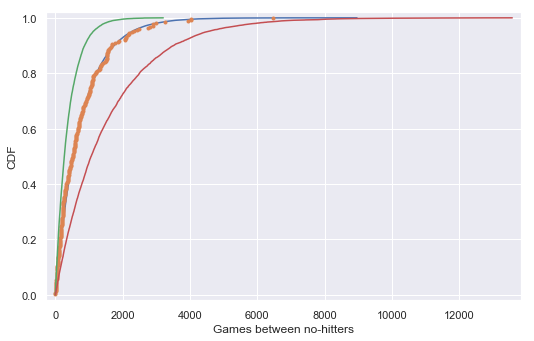

In [9]:
# How is this parameter optimal?

# Plot the theoretical  and data CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

# Notice how the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.

#### Exercício 5 - Linear regression by least squares

In [10]:
#vídeo

# Least squares: The process of finding the parameters for which the sum of the squares of the residuals is minimal
# we'll use np.polyfit()

Exercício 6

In [11]:
# we will look at the correlation between female iliteracy and fertility (defined as the average number of 
# children born per woman) throughout the world. 

# data
df_female_literacy_fertility = pd.read_csv(data_folder + "female_literacy_fertility.csv")
illiteracy = 100 - df_female_literacy_fertility['female literacy']
fertility = df_female_literacy_fertility['fertility']


# Computing the Pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between **two** arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Pearson correlation coefficient
    return corr_mat[0,1]

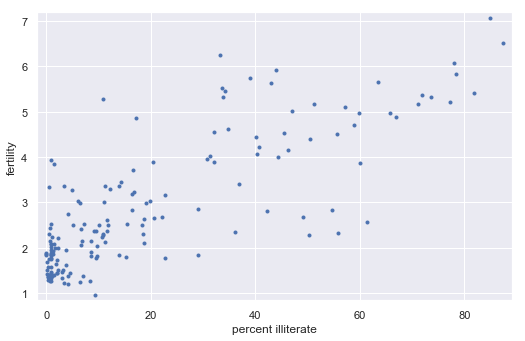

Pearson correlation coefficient: 0.8041324026815346


In [12]:
# First, EDA of literacy/fertility data

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

# Show the Pearson correlation coefficient
print("Pearson correlation coefficient:", pearson_r(illiteracy, fertility))

Exercício 7

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


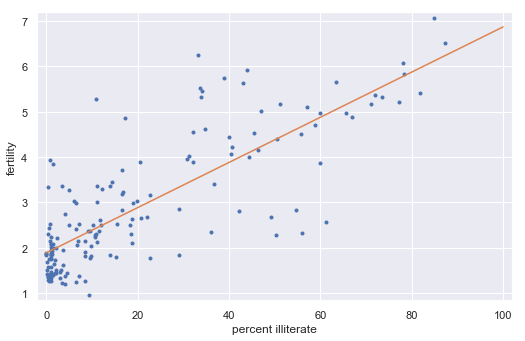

In [13]:
# Linear regression

# Plot the illiteracy rate versus fertility
plt.plot(illiteracy, fertility, marker='.', linestyle='none')

plt.margins(0.02)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

In [14]:
np.polyfit(illiteracy, fertility, 1)

array([0.04979855, 1.88805061])

Exercício 8

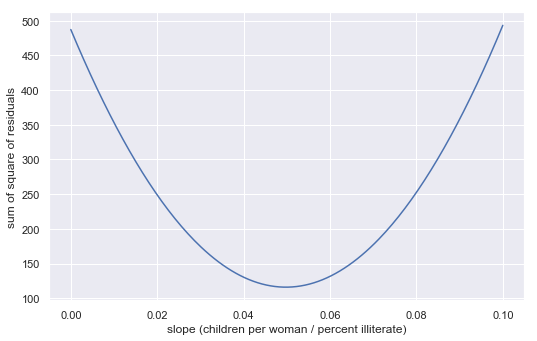

In [15]:
# How is it optimal?

# The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. 
# It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). 
# In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. 
# To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. 
# Where is it minimal?

# Specify the values of the slope to compute the RSS. Use np.linspace() to get 200 points in the range between 0 and 0.1.
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - (a*illiteracy + b))**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

# Great work! Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of 
# the residuals, is the same value you got when performing the regression. (0.049...)

#### Exercício 9 - The importance of EDA: Anscombe's quartet

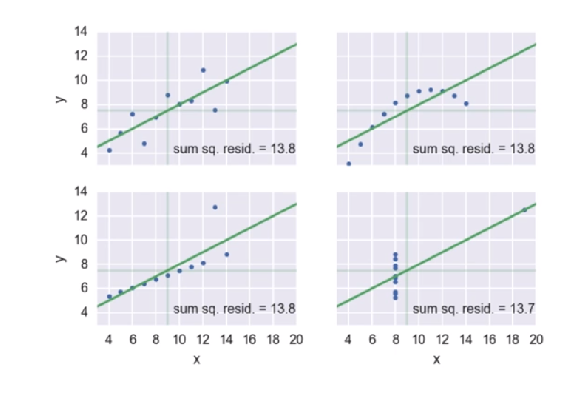

In [16]:
#vídeo

# Anscombe's quartet
imagem = plt.imread(data_folder + "Anscombe quartet.PNG")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.3, right=1.2, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# A reminder of... "look before you leap" -- do graphical EDA first


Exercício 10

In [17]:
# Why should exploratory data analysis be the first step in an analysis of data ?

# you can be protected from misinterpretation of the type demonstrated by Anscombe's quartet.
# EDA provides a good starting point for planning the rest of your analysis.
# EDA is not really any more difficult than any of the subsequent analysis, so there is no excuse for not exploring the data.

Exercício 11

0.5000909090909091 3.000090909090908


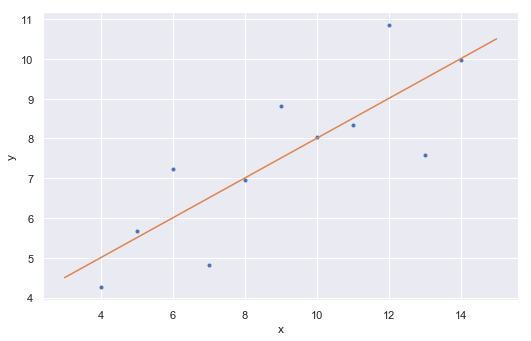

In [18]:
# Linear regression on appropriate Anscombe data

# Anscombe data (1)
df_anscombe = pd.read_csv(data_folder + "anscombe.csv")
x = pd.to_numeric(df_anscombe['0'][1:])
y = pd.to_numeric(df_anscombe['0.1'][1:])
######################################################################

# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 12

In [19]:
# todos os exemplos nos dados
df_anscombe = pd.read_csv(data_folder + "anscombe.csv")

anscombe_x = []
anscombe_y = []

for i in range(len(df_anscombe.columns)):
    if i % 2 == 0:
        anscombe_x.append(np.array(pd.to_numeric(df_anscombe.iloc[1:, i])))
    else:
        anscombe_y.append(np.array(pd.to_numeric(df_anscombe.iloc[1:, i])))

In [20]:
# Linear regression on all Anscombe data

# Iterate through x,y pairs
for x, y in zip(anscombe_x , anscombe_y ):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)
    
# têm todos a mesma função

slope: 0.5000909090909091 intercept: 3.000090909090908
slope: 0.5 intercept: 3.0009090909090905
slope: 0.4997272727272729 intercept: 3.002454545454545
slope: 0.4999090909090908 intercept: 3.001727272727274


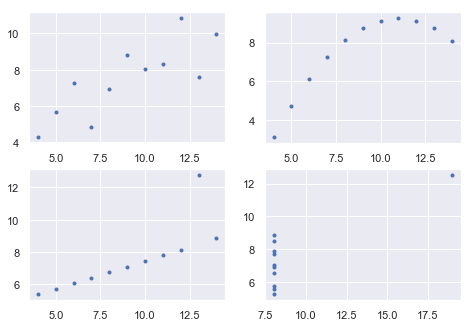

In [21]:
# all data
df_anscombe = pd.read_csv(data_folder + "anscombe.csv")

for i in range(len(df_anscombe.columns)):
    globals()["x" + str(i)] = np.array(pd.to_numeric(df_anscombe.iloc[1:, i]))
    

plt.subplot(2,2,1)
plt.plot(x0, x1, marker='.', linestyle='none')
plt.subplot(2,2,2)
plt.plot(x2, x3, marker='.', linestyle='none')
plt.subplot(2,2,3)
plt.plot(x4, x5, marker='.', linestyle='none')
plt.subplot(2,2,4)
plt.plot(x6, x7, marker='.', linestyle='none')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.2)
plt.show()

# CHAPTER 2 - Bootstrap confidence intervals

#### Exercício 1 - Generating bootstrap replicates

In [22]:
#vídeo

# Bootstrapping
# The use of resampled data to perform statistical inference

Exercício 2

In [23]:
# What is a bootstrap replicate?
# A single value of a statistic computed from a bootstrap sample.

Exercício 3

In [24]:
# Bootstrapping by hand

# Imagine you have a data set that has only three points, [-1, 0, 1]. 
# How many unique bootstrap samples can be drawn (e.g., [-1, 0, 1] and [1, 0, -1] are unique), 
# and what is the maximum mean you can get from a bootstrap sample?

# resposta: There are 27 unique samples, and the maximum mean is 1.

Exercício 4

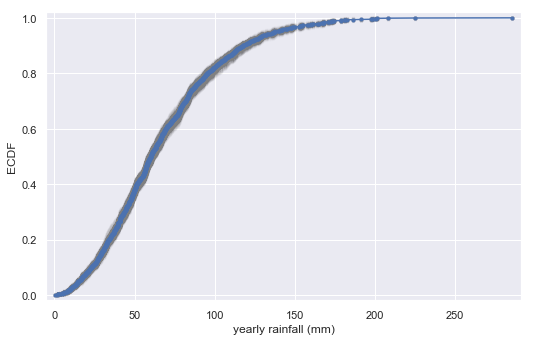

In [25]:
# Visualizing bootstrap samples

df_sheffield_weather_station = pd.read_csv(data_folder + "sheffield_weather_station.csv", comment="#", delim_whitespace=True)
df_sheffield_weather_station.rename(columns={'yyyy': 'year', 'af': 'air_frost'}, inplace=True) 

# in units of millimeters (mm)
rainfall = df_sheffield_weather_station['rain']


for i in range(50):
    # Generate bootstrap sample: bs_sample
    # Be sure that the size of the resampled array is len(rainfall)
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.01) #(to make them semi-transparent)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
plt.xlabel('yearly rainfall (mm)')
plt.ylabel('ECDF')

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

#### Exercício 5 - Bootstrap confidence intervals

michelson_speed_of_light mean: 299858.5
michelson_speed_of_light std: 85.24529312519256
michelson_speed_of_light median: 299850.0
Várias réplicas com for loop


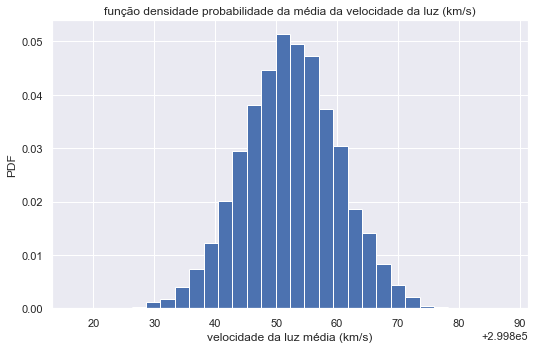

If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval (TLC)

Intervalo de confiança para a média da velocidade da luz, com 95% de confiança: [299837.1975 299867.7025]
np.percentile(bs_replicates, [2.5, 97.5])


In [26]:
#vídeo
# Bootstrap confidence intervals

# Podemos criar uma função para criar uma réplica (of 1D data):

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))  #não esquecer que o size tem que ser do tamanho dos dados (1D array)

# por exemplo,
michelson_data = pd.read_csv(data_folder + "michelson_speed_of_light.csv")
michelson_speed_of_light = michelson_data['velocity of light in air (km/s)'] 

print("michelson_speed_of_light mean:", bootstrap_replicate_1d(michelson_speed_of_light, np.mean))
print("michelson_speed_of_light std:", bootstrap_replicate_1d(michelson_speed_of_light, np.std))
print("michelson_speed_of_light median:", bootstrap_replicate_1d(michelson_speed_of_light, np.median))

print("========================================================================================")

# Como fazemos muitas réplicas? for loop
print("Várias réplicas com for loop")
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

plt.hist(bs_replicates, bins=30, density=True)
plt.xlabel("velocidade da luz média (km/s)")
plt.ylabel("PDF")
plt.title("função densidade probabilidade da média da velocidade da luz (km/s)")
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

print("========================================================================================")

# Em vez de ver através de um gráfico, podemos sumariar o resultado construindo um intervalo de confiança para uma estatística

print("If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval (TLC)")

# (Bootstrap) Confidence interval of a statistic

conf_int = np.percentile(bs_replicates, [2.5, 97.5])

print("\nIntervalo de confiança para a média da velocidade da luz, com 95% de confiança:", conf_int)
print("np.percentile(bs_replicates, [2.5, 97.5])")

Exercício 6

In [27]:
# Generating many bootstrap replicates (feito em cima)

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data))) 

# Now you'll write another function, draw_bs_reps(), which generates many bootstrap replicates from the data set. 

def draw_bs_reps(data, func, size=1):
    
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates



# ou

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for i in range(size)])

Exercício 7

In [28]:
# In this exercise, you will compute a **bootstrap estimate of the probability density function of the mean annual rainfall 
# at the Sheffield Weather Station**. 

# Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of
# the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. 
# You will plot the PDF as a histogram, and you will see that it is Normal.

# In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always 
# be Normally distributed (teorema do limite central). 
# (This does not hold in general, just for the mean and a few other statistics.)

# The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation 
# of the data divided by the square root of the number of data points. 
# I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). 

# Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from
# your bootstrap replicates.

rainfall = df_sheffield_weather_station['rain']


0.9488593574676786
0.9418496802507673


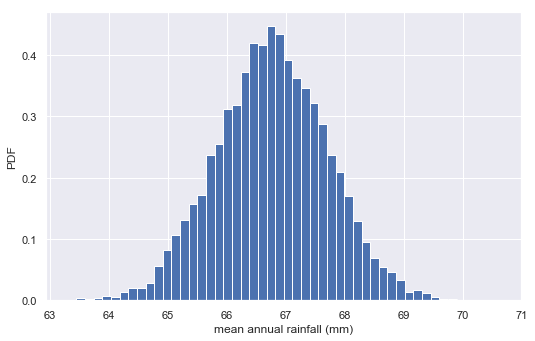

In [29]:
# Bootstrap replicates of the mean and the SEM

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM 
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

# Notice that the SEM we got from the known expression and the bootstrap replicates is the same. 
# The distribution of the bootstrap replicates of the mean is Normal.

Exercício 8

In [30]:
# What is the 95% confidence interval?

print("95% confidence interval for the mean annual rainfall (mm):")
print(np.percentile(bs_replicates, [2.5, 97.5]))

95% confidence interval for the mean annual rainfall (mm):
[64.94115949 68.62382803]


Exercício 9

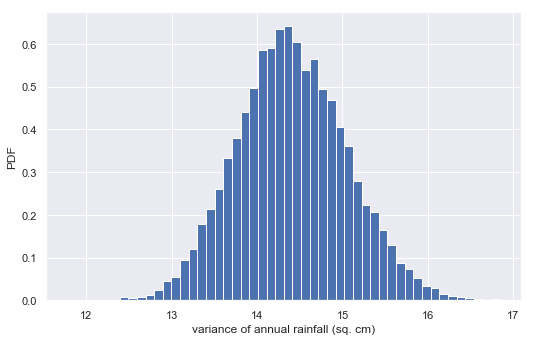

the PDF of the replicas of the variance of the data is not normally distributed, it has a longer tail to the right.

confidence interval for the variance of rainfall with 95% confidence: [13.1991011  15.71147681]


In [31]:
# Bootstrap replicates of other statistics


# We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics,
# but worry not: as hackers, we can always take bootstrap replicates! 

# In this exercise, you'll generate bootstrap replicates for the **variance** of the annual rainfall at the Sheffield Weather 
# Station and plot the histogram of the replicates.

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data))) 

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for i in range(size)])

#########################################################################################################################

# Generate 10,000 bootstrap replicates of the *variance*: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

# Great work! This is *not* normally distributed, as it has a longer tail to the right. 
# Note that you can also compute a confidence interval on the variance, or any other statistic, using np.percentile() 
#with your bootstrap replicates.
print("the PDF of the replicas of the variance of the data is not normally distributed, it has a longer tail to the right.")
print("\nconfidence interval for the variance of rainfall with 95% confidence:", np.percentile(bs_replicates, [2.5, 97.5]))

Exercício 10

95% confidence interval = [664.22280876 870.25557769] games


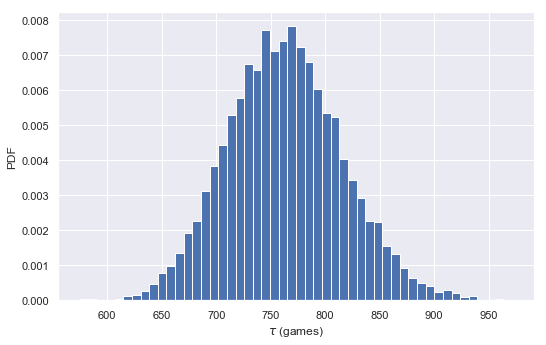

In [32]:
# Confidence interval on the rate of no-hitters

nohitter_times = [843, 1613, 1101, 215, 684, 814, 278, 324, 161, 219, 545, 715, 966, 624, 29, 450, 107, 20, 91, 1325, 124, 1468, 104, 1309,  429, 62, 1878, 1104, 123, 251,   93,  188,  983,        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,        876,  381,  905,  156,  419,  239,  119,  129,  467]

# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

# This gives you an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

#### Exercício 11 - Pairs bootstrap

In [33]:
%%script false
#vídeo

# --> Nonparametric inference (o que fizemos)
# Make no assumptions about the model or probability distribution underlying the data


# --> Parametric inference

# Pelo contrário, quando fizemos a regressão linear, usámos um modelo linear, com 2 parâmetros (slope and intercept).
# Isto foi uma estimativa paramétrica.

# E se fizéssemos as eleições novamente, em condições idênticas? A inclinação e b mudariam?
# Existem várias formas de obter estimativas bootstrap de intervalos de confiança para estes parâmetros: 
# Cada um assume coisas diferentes.
# Vamos ver o que assume menos condições: "Pairs bootstrap for linear regression"

# We cannot resample each individual data since each county has 2 variables associated(nr votes and vote share for Obama),so:

# 1) Resample data in pairs
#    randomly select a county and keep the 2 variables as a pair (the bootstrap sample consists of x,y pairs) 

# 2) Compute the slope and intercept from resampled data 
# 3) Each slope and intercept is a bootstrap replicate
# 4) Compute confidence intervals from percentiles of bootstrap replicates


Couldn't find program: 'false'


Exercício 12

In [34]:
# A function to do pairs bootstrap on a set of x,y data.

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: **inds** <---------
    # **These are what you will resample and use them to pick values out of the x and y arrays.**
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


Exercício 13

[0.04403284 0.05528849]


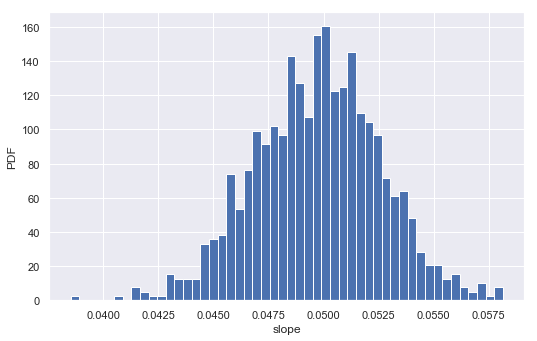

In [35]:
# Pairs bootstrap of literacy/fertility data

# data
df_female_literacy_fertility = pd.read_csv(data_folder + "female_literacy_fertility.csv")
illiteracy = 100 - df_female_literacy_fertility['female literacy']
fertility = df_female_literacy_fertility['fertility']
#####################################################################################################

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5])) # estimating the slope from the data

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')

plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()


Exercício 14

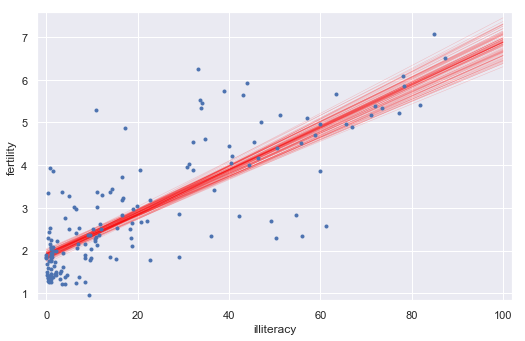

In [36]:
# Plotting bootstrap regressions

# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='red')

# Plot the data, scatter plot
plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
plt.xlabel('illiteracy')
plt.ylabel('fertility')
plt.margins(0.02)

plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()


# Chapter 3 - Introduction to hypothesis testing

#### Exercício 1 - Formulating and simulating a hypothesis

In [37]:
#vídeo
# Formulating and simulating a hypothesis

# Assessment of how reasonable the observed data are assuming a hypothesis is true

# Is there a difference between ohio and pensilvannia regarding the dem_share?
# the mean, median and even std are almost the same
# we'll test this

df_swing_states = pd.read_csv(data_folder + "2008_swing_states.csv")

# dem_shares of the 2 counties
dem_share_PA = df_swing_states[df_swing_states['state'] == 'PA'].dem_share
dem_share_OH = df_swing_states[df_swing_states['state'] == 'OH'].dem_share

# concatenate the 2
dem_share_both = np.concatenate((dem_share_PA, dem_share_OH)) # notice that they are tuples

# mix them (np.random.choice tem replacement, np.random.permutation apenas muda a ordem aleatoriamente)
dem_share_perm = np.random.permutation(dem_share_both)

# name the first one thing and the others another thing
perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

print("dps vemos graficamente as ECDFs para ter uma ideia e depois testamos mesmo")



# np.random.permutation has two differences from np.random.shuffle:
# if passed an array, it will return a shuffled copy of the array; np.random.shuffle shuffles the array inplace
# if passed an integer, it will return a shuffled range i.e. np.random.shuffle(np.arange(n))

dps vemos graficamente as ECDFs para ter uma ideia e depois testamos mesmo


Exercício 2

In [38]:
# Generating a permutation sample

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


# or

def permutation_sample(data1, data2):
    permuted_data = np.random.permutation(np.concatenate((data1, data2)))
    return permuted_data[:len(data_1)], permuted_data[len(data_1):]

Exercício 3

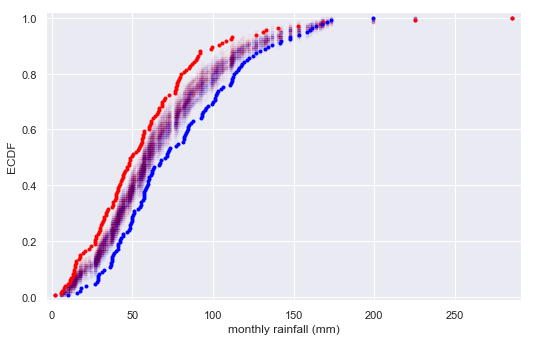

In [39]:
# Visualizing permutation sampling

# We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in July (a dry month) 
# and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see
# how their ECDFs would ** look **if they were identically distributed**.

rain_june = [66.2, 39.7, 76.4, 26.5, 11.2, 61.8, 6.1, 48.4, 89.2, 104. , 34. , 60.6, 57.1, 79.1, 90.9, 32.3, 63.8, 78.2, 27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2]
rain_november = [83.6, 30.9, 62.2, 37. , 41. , 160.2, 18.2, 122.4, 71.3, 44.2, 49.1, 37.6, 114.5, 28.8, 82.5, 71.9, 50.7, 67.7,       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,       161.6, 112.7,  37.4, 110.6,  56.6, 95.8, 126.8]

def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

#########################################################################################################################

# --> simulate
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', alpha=0.02)
    plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)

    
# --> Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')


# Label axes, set margin, and show plot
plt.margins(0.02)
plt.xlabel('monthly rainfall (mm)')
plt.ylabel('ECDF')

plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()


# Great work! Notice that the permutation samples ECDFs overlap and give a purple haze. 
# None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not 
# commensurate with the data. July and November rainfall are not identically distributed.

#### Exercício 4 - Test statistics and p-values

In [40]:
#vídeo

# OH and PA different? (continuação)

# Test statistic
# --> A single number that can be computed from observed data **and** from data you simulate under the null hypothesis (H0)
# it serves as a basis of comparison between what the hypothesis predicts and what we actually observe

# escolher a estatística de teste consoante o que queremos responder no problema
# por exemplo, se são idênticos, devem ter a mesma média (a diferença das médias = 0 é a estatística de teste)


# Dif média dos arrays atribuídos após fazer a permutação:
print(np.mean(perm_sample_PA) - np.mean(perm_sample_OH))

# Dif média nos dados originais:
print(np.mean(dem_share_PA) - np.mean(dem_share_OH))

# repetir a experiência n vezes; mostrar graficamente; comparar percentis no gráfico/p-value com nível de significância


# Nota: statistical significance != practical significance

0.38034430122116447
1.1582360922659518


Exercício 5

In [41]:
# When performing hypothesis tests, your choice of test statistic should be:
# pertinent to the question you are seeking to answer in your hypothesis test

Exercício 6

In [42]:
# What is a p-value?
# the probability of observing a test statistic equally or more extreme than the one you observed, given that 
# the null hypothesis is true.

Exercício 7

In [43]:
# Generating permutation replicates

# function for generating a permutation replicate
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2


# Generating permutation replicates

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates


Exercício 8

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


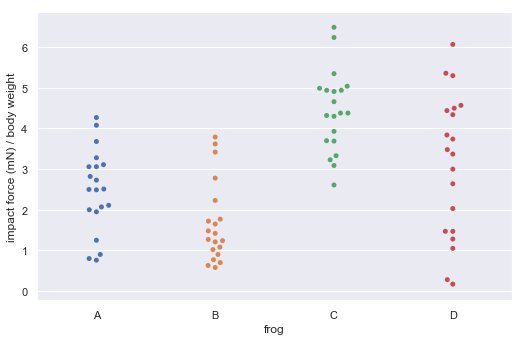

In [44]:
# Look before you leap: EDA before hypothesis testing

# The researchers measured the impact force of 20 strikes for each frog. 
# We will test the hypothesis that the two frogs have the same distribution of impact forces.

#######################################################################################################
df = pd.read_csv(data_folder + "frog_tongue.csv", comment='#')
df_2 = df[['ID', 'impact force / body weight']]
df_2['ID'] = df_2['ID'].map({'I': "A", 'II': "B", 'III': "C", 'IV': "D"})
#######################################################################################################


# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact force / body weight', data=df_2)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (mN) / body weight')

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()


# Eyeballing it, it does not look like they come from the same distribution. Frog C&D have three or four very
# hard strikes, and Frog A&B a couple weak ones. However, it is possible that with only 20 samples it 
# might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

Exercício 9

In [45]:
# The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N(editar) 
# It is possible the frogs strike with the same force and this observed difference was by chance.
# You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis 
# that the **distributions** of strike forces for the two frogs are identical. 

# We use a permutation test with a test statistic of the difference of means to test this hypothesis.
# For your convenience, the data has been stored in the arrays force_a and force_b. (editar)

force_a = df_2[df_2['ID'] == 'A']['impact force / body weight']
force_b = df_2[df_2['ID'] == 'B']['impact force / body weight']

print("===========================================================")
print("Média A:", force_a.mean())
print("Média B:", force_b.mean())
print("diferença A - B:", force_a.mean() - force_b.mean())
print("===========================================================")

# function for generating a permutation replicate
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2


# Generating permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

Média A: 2.4715
Média B: 1.6639999999999997
diferença A - B: 0.8075000000000001


In [46]:
# Permutation test on frog data (vou fazer entre o A e o B)

# diferença entre médias:
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff


# diferença de médias entre a força aplicada aos sapos D e B (dados): empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)   # 0.8075000000000001

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=100000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


# The p-value tells you that there is about a 0.14% chance that you would get the difference of means observed in the 
# experiment if frogs D and B were exactly the same. A p-value below 0.01 (1%) or 0.05 (5%) (depende do contexto) is 
# typically said to be "statistically significant," but warning: You have computed a p-value; it is a number. 
# I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be 
# "statistically significant," but they are not the same.

p-value = 0.00833


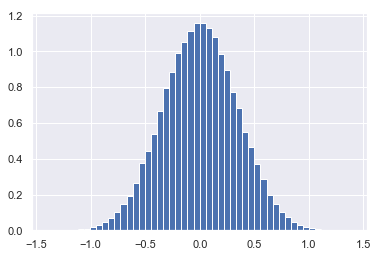

In [47]:
# distribuição das réplicas das permutações
plt.hist(perm_replicates, bins=50, density=True)
plt.show()

#### Exercício 10 - Bootstrap hypothesis tests

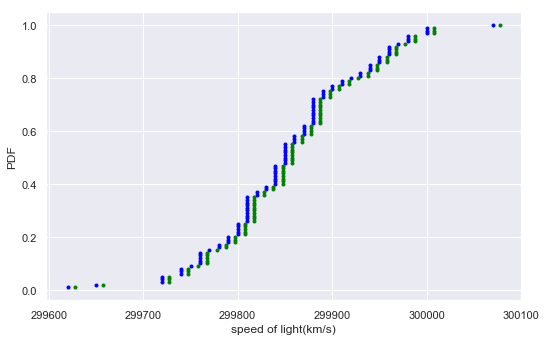

-7.599999999976717
0.163
Como 0.1666 > 0.05, não rejeitamos H0. Não existe evidência estatística para concluir que a média é diferente


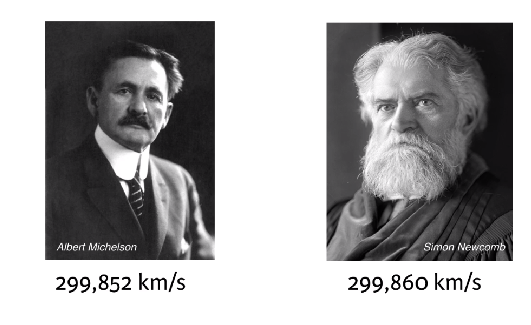

In [48]:
#vídeo
# Bootstrap hypothesis tests

# data from michelson
michelson_data = pd.read_csv(data_folder + "michelson_speed_of_light.csv")
michelson_speed_of_light = michelson_data['velocity of light in air (km/s)'] 

# Michelson got an average of 299,852 km/s. Newcomb got 299,860 km/s, but didn't present the data. (permutações n vai dar)
# Há algo de muito diferente entre os experimentos de um e de outro?


# --> Null hypothesis: The true mean speed of light in Michelson’s experiments was actually Newcomb's reported value.

# isto é, a média da velocidade que o Michelson obteria se tivesse feito a experiência muitas muitas vezes
# temos que simular os dados do michelson para chegar à velocidade obtida pelo newcomb 


# ---> Shifting the Michelson data:
newcomb_value = 299860
michelson_shifted = michelson_speed_of_light - np.mean(michelson_speed_of_light) + newcomb_value

# ECDF dados michelson
x_mich, y_mich = ecdf(michelson_speed_of_light)
plt.xlabel("speed of light(km/s)")
plt.ylabel("PDF")
plt.plot(x_mich, y_mich, marker='.', linestyle='none', color='blue')

# ECDF dados michelson tendo a média do newcomb em vez da dele
x_2, y_2 = ecdf(michelson_shifted)
plt.plot(x_2, y_2, marker='.', linestyle='none', color='green')
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()


# Agora, fazer bootstraping nestes novos dados sob Ho
# a estatística de teste é a média da amostra das simulações (bootstrap) menos newcomb_value


# função geral para definir a diferença entre os dados obtidos e o valor do newcomb
def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data) - newcomb_value

# diferença empírica observada
diff_obs = diff_from_newcomb(michelson_speed_of_light)
print(diff_obs) # os tais -0,008 km/s mais ou menos

# fazer as réplicas
bs_replicates = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000) #usámos os dados shifted, por causa da H0

# p-value
p_value = np.sum(bs_replicates <= diff_obs) / 10000

print(p_value)
print("Como 0.1666 > 0.05, não rejeitamos H0. Não existe evidência estatística para concluir que a média é diferente")

######################################################################################
imagem = plt.imread(data_folder + "speed_of_light.png")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

Exercício 11

p =  0.0156
Com base num nível de significância de 5%, temos evidência estatística para concluir que as médias são diferentes
Nota: o desvio-padrão da force_b é: 0.9988540802760986 , que multiplicado por 1.96 dá 1.957753997341153
o p-value seria 7% com frog_Y_mean = 1.97. A distribuição não é normal (admitindo que 20 chega)


C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


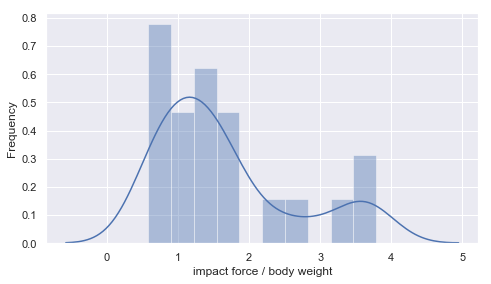

In [49]:
# A one-sample bootstrap hypothesis test

# Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. 
# Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you 
# don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from
# Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis:

# The mean strike force of Frog B == mean strike force of Frog C.

# To set up the bootstrap hypothesis test, you will take the *mean* as our test statistic. Remember, your goal is to 
# calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the 
# hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all
# of the data of Frog B such that the mean is 0.55 N. This involves adding the *mean force of Frog C* and subtracting the
# *mean force of Frog B* from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the
# variance, unchanged.
#############################################################################################################

# Vou testar com o sapo Y, com outra média (para dar resultado semelhante)
frog_Y_mean = 2.1

# sapo B
force_b = df_2[df_2['ID'] == 'B']['impact force / body weight']   # a média é 1.66

# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + frog_Y_mean

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

print("Com base num nível de significância de 5%, temos evidência estatística para concluir que as médias são diferentes")


print("===============================================================================================================")
print("Nota: o desvio-padrão da force_b é:", force_b.std(), ", que multiplicado por 1.96 dá", force_b.std()*1.96)
print("o p-value seria 7% com frog_Y_mean = 1.97. A distribuição não é normal (admitindo que 20 chega)")

sns.distplot(force_b, bins=10)
plt.ylabel("Frequency")
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.8, wspace=0.6, hspace=0.4)
plt.show()

# Great work! The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force
# is false.

Exercício 12

In [50]:
# A two-sample bootstrap hypothesis test for difference of means (com os dados deles)

# We now want to test the hypothesis that Frog A and Frog B have *the same mean* impact force, ***but not necessarily the 
# same distribution***, which is also impossible with a permutation test.

# To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis
# that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference 
# in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates
# with a difference in means greater than or equal to what was observed.
# The objects forces_concat and empirical_diff_means are already in your namespace.

force_a = [1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453, 0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383, 0.457, 0.73]
force_b = [0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72, 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711, 0.614, 0.468]

empirical_diff_means = np.mean(force_a) - np.mean(force_b)   # 0.28825000000000006
##################################################################################################################

# Null hypothesis: empirical_diff_means == 0

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data))) 

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for i in range(size)])


# Pegar na média da concatenação das duas forças, criar 2 "forças" desviadas por essa média, criar 10000 réplicas da 
# diferença entre as médias das 2 desviadas e depois ver as vezes que saiu >= do que a verificada empiricamente.

forces_concat = np.concatenate((force_a, force_b))

# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force   # np.mean(force_a_shifted) = 0.56322499999
force_b_shifted = force_b - np.mean(force_b) + mean_force   # np.mean(force_b_shifted) = 0.56322499999

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 100000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 100000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

print("""\nComo p-value < 0.05, rejeitamos a hipótese nula. You got a similar result as when you did the permutation test.
Nonetheless, remember that it is important to carefully think about what question you want to ask. Are you only interested 
in the mean impact force, or in the distribution of impact forces?""")

p-value = 0.00459

Como p-value < 0.05, rejeitamos a hipótese nula. You got a similar result as when you did the permutation test.
Nonetheless, remember that it is important to carefully think about what question you want to ask. Are you only interested 
in the mean impact force, or in the distribution of impact forces?


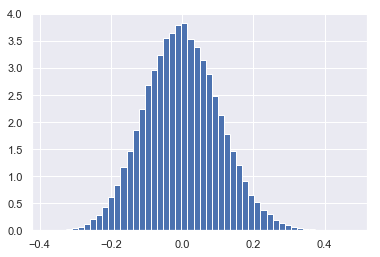

In [51]:
# distribuição das réplicas
plt.hist(bs_replicates, bins=50, density=True)
plt.show()

# Chapter 4 - Hypothesis test examples

#### Exercício 1 - A/B Testing

In [52]:
%%script false
# vídeo

#A/B testing

# exemplo, uma empresa redesenhou a página de abertura e quer ver se resultou
# pegamos em 500 e redirecionamos para a página antiga. Outros 500 para a página nova.
# Vemos se continuam a ver o site. 45 num continuaram, 67 noutro. Parece bom, mas Houve realmente diferença?
# Qual a probabilidade de ter um resultado pelo menos tão bom quanto este?
# Testes de hipóteses é uma boa opção. 
# Testes envolvendo permutações pq podemos fazer a experiência como se o redesign não tivesse impacto nenhum.

# Permutation test of clicks through:

# clickthrough_A, clickthrough_B: arr. of 1s and 0s
def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B - frac_A

#diferença observada
diff_frac_obs = diff_frac(clickthrough_A, clickthrough_B)

# agora fazemos as replicações
perm_replicates = np.empty(10000)

for i in range(10000):
    perm_replicates[i] = permutation_replicate(clickthrough_A, clickthrough_B, diff_frac)

p_value = np.sum(perm_replicates >= diff_frac_obs) / 10000 
p_value 
[out] 0.016  # a probabilidade de os resultados serem devidos ao acaso é pequena, o redesign teve efeito

# Null hypothesis of an A/B test: the test statistic is impervious to change (a proporção é a mesma)


# once again: statistical significance is not the same as practical significance
# (por exemplo, se poucas pessoas forem ao site a mudança pode não compensar o custo)

Couldn't find program: 'false'


Exercício 2

In [53]:
# The vote for the Civil Rights Act in 1964

# The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding
# "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans
# voted nay. Did party affiliation make a difference in the vote?

# To answer this question, you will evaluate the hypothesis that **the party of a House member has no bearing on his or her
# vote**. You will use the **fraction of Democrats voting in favor** as your test statistic and evaluate the probability of
# observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right,
# at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute
# the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the
# fraction of Democrats voting yea.

def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates


# percentage of dems voting yea: 0.6270491803278
# percentage of reps voting yea: 0.7953216374269005

###############################################################################################


# Null hypothesis: "the party of a House member has no impact on his or her vote"
# test statistic: "fraction of Democrats voting yea"

# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire 10000 permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)      #the length of data_1 (dems), 244

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

# This small p-value suggests that party identity had a lot to do with the voting. (we reject the null hypothesis)

p-value = 0.0002


In [54]:
# Or

# Null hypothesis: "the party of a House member has no impact on his or her vote"
# test statistic: "fraction of Republicans voting yea"

# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_reps(dems, reps):
    """Compute fraction of Republican yea votes."""
    frac = np.sum(reps) / len(reps)
    return frac

# Acquire 10000 permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_reps, 10000)      #the length of data_1 (dems), 244 (os reps têm 171)

# Compute and print p-value: p
p = np.sum(perm_replicates >= 136/(136+35)) / len(perm_replicates)
print('p-value =', p)

# This small p-value suggests that party identity had a lot to do with the voting. (we reject the null hypothesis)

p-value = 0.0003


Exercício 3

In [55]:
# Which of the following situations involving testing by a web-based company has an equivalent set up for an A/B test as 
# the one you just did with the Civil Rights Act of 1964?

# You measure the number of people who click on an ad on your company's website before and after changing its color.

Exercício 4

In [56]:
# A time-on-website analog

# In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly,
# the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem 
# you will perform an A/B test to determine **if these rule changes resulted in a slower rate of no-hitters** (i.e., longer
# average time between no-hitters) using the **difference in mean** inter-no-hitter time as your test statistic. The 
# inter-no-hitter times for the respective eras are stored in the arrays nht_dead and nht_live, where "nht" is meant to
# stand for "no-hitter time."

nht_dead = [-1, 894, 10, 130, 1, 934, 29, 6, 485, 254, 372, 81, 191, 355, 180, 286, 47, 269, 361, 173, 246, 492, 462, 1319, 58,  297, 31, 2970, 640, 237, 434, 570, 77, 271, 563, 3365, 89, 0, 379, 221, 479, 367, 628, 843, 1613, 1101, 215, 684, 814, 278, 324, 161, 219, 545, 715, 966, 624, 29, 450, 107, 20, 91, 1325, 124, 1468, 104, 1309, 429, 62, 1878, 1104, 123, 251, 93, 188, 983, 166, 96, 702, 23, 524, 26, 299, 59, 39, 12, 2, 308, 1114, 813, 887]
nht_live = [645, 2088, 42, 2090, 11, 886, 1665, 1084, 2900, 2432, 750, 4021, 1070, 1765, 1322, 26, 548, 1525, 77, 2181, 2752, 127, 2147, 211, 41, 1575, 151, 479, 697, 557, 2267, 542, 392, 73, 603, 233, 255, 528, 397, 1529, 1023, 1194, 462, 583, 37, 943, 996, 480, 1497, 717, 224, 219, 1531, 498, 44, 288, 267, 600, 52, 269, 1086, 386, 176, 2199, 216, 54, 675, 1243, 463, 650, 171, 327, 110, 774, 509, 8, 197, 136, 12, 1124, 64, 380, 811, 232, 192, 731, 715, 226, 605, 539, 1491, 323, 240, 179, 702, 156, 82, 1397, 354, 778, 603, 1001, 385, 986, 203, 149, 576, 445, 180, 1403, 252, 675, 1351, 2983, 1568, 45, 899, 3260, 1025, 31, 100, 2055, 4043, 79, 238, 3931, 2351, 595, 110, 215, 0, 563, 206, 660,  242, 577, 179, 157, 192, 192, 1848, 792, 1693, 55, 388, 225, 1134, 1172, 1555, 31, 1582, 1044, 378, 1687, 2915, 280, 765, 2819, 511, 1521, 745, 2491, 580, 2072, 6450, 578, 745, 1075, 1103, 1549, 1520, 138, 1202, 296, 277, 351, 391, 950, 459, 62, 1056, 1128, 139, 420, 87, 71, 814, 603, 1349, 162, 1027, 783, 326, 101, 876, 381, 905, 156, 419, 239, 119, 129, 467]

# Null-hypothesis: "The rules had no change on the rate of no-hitters"
# test statistic: "difference in means"

# observed difference
obs_diff = np.mean(nht_live) - np.mean(nht_dead)

# permutations

def diff_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)

permutations = draw_perm_reps(nht_live, nht_dead, diff_means, 10000)        # samples length: nht_live

p_value = np.sum(permutations >= obs_diff) / len(permutations)
p_value

# Como p-value < 0.05, rejeitamos Ho. Não existe evidência estatística suficiente para concluir que as regras não alteraram
# o tempo que passa entre no-hitters

# This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates
# that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller 
# than 0.0001.

0.0

Exercício 5

In [57]:
# That was a nice hypothesis test you just did to check out whether the rule changes in 1920 changed the rate of no-hitters.
# But what should you have done with the data first?

# Performed EDA, perhaps plotting the ECDFs of inter-no-hitter times in the dead ball and live ball eras

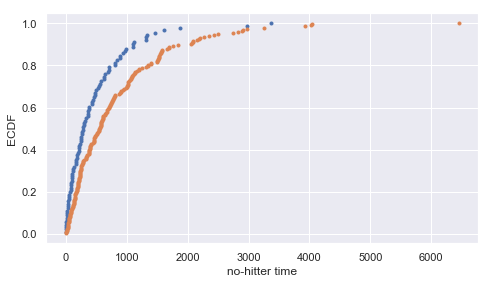

In [58]:
# ECDF

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

plt.plot(ecdf(nht_dead)[0], ecdf(nht_dead)[1], marker='.', linestyle='none')
plt.plot(ecdf(nht_live)[0], ecdf(nht_live)[1], marker='.', linestyle='none')
plt.ylabel("ECDF")
plt.xlabel("no-hitter time")

#plot
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.8, wspace=0.6, hspace=0.4)
plt.show()

# by eye the null hypothesis that the distributions are the same is almost certainly not true.

#### Exercício 6 - Test of correlation

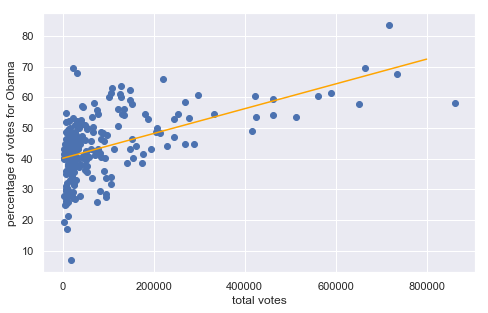

Correlation coefficient: 0.5361973649586779

p-value: 0.0
Não existe evidência estatística suficiente (quase nula mesmo) para suportar a hipótese de que as duas variáveis 
não estão correlacionadas

Distribuição das simulações do coeficiente de correlação


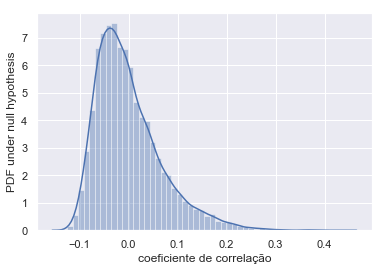

In [59]:
#vídeo

df_swing_states = pd.read_csv(data_folder + "2008_swing_states.csv")
plt.scatter(df_swing_states['total_votes'], df_swing_states['dem_share'])
plt.xlabel("total votes")
plt.ylabel("percentage of votes for Obama")

a, b = np.polyfit(df_swing_states['total_votes'], df_swing_states['dem_share'], 1)
x = np.array([0, 800000])
y = a * x + b
plt.plot(x, y, color='orange')

#plot
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=0.8, wspace=0.6, hspace=0.4)
plt.show()

##############################################################################################################
# coeficiente de correlação 
print("Correlation coefficient:", np.corrcoef(df_swing_states['total_votes'], df_swing_states['dem_share'])[0, 1])


# How can we be sure this correlation is not by chance? --> hypothesis test

# Null hypothesis: "the two variables are completely uncorrelated" 
# test statistic: "pearson correlation coefficient"

corr_coeff_observed = np.corrcoef(df_swing_states['total_votes'], df_swing_states['dem_share'])[0, 1]

def pearson_corr_coeff(data_1, data_2):
    return np.corrcoef(data_1, data_2)[0, 1]
    
permutations = draw_perm_reps(df_swing_states['total_votes'], df_swing_states['dem_share'], pearson_corr_coeff, 10000)

p_value = np.sum(permutations >= corr_coeff_observed) / len(permutations)
print("\np-value:", p_value)
print("""Não existe evidência estatística suficiente (quase nula mesmo) para suportar a hipótese de que as duas variáveis 
não estão correlacionadas""")
# rejeitamos Ho: há correlação entre as duas variáveis


# histograma das simulações
print("\nDistribuição das simulações do coeficiente de correlação")
sns.distplot(permutations)
plt.ylabel("PDF under null hypothesis")
plt.xlabel("coeficiente de correlação")
plt.show()

Exercício 7

In [60]:
# Simulating a null hypothesis concerning correlation:

# The observed correlation between female illiteracy and fertility in the data set of 162 countries may just be by chance;
# the fertility of a given country may actually be totally independent of its illiteracy. You will test this null hypothesis
# in the next exercise.
# To do the test, you need to simulate the data assuming the null hypothesis is true. Of the following choices, which is 
# the best way to to do it?

#resposta: 
print("""Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate a new set of 
illiteracy, fertility) data.""")

# It is exact because it uses all data and eliminates any correlation because which illiteracy value pairs to which 
# fertility value is shuffled.

      
    # A outra hipótese, de simular ambas:

# É computacionalmente menos eficiente do que permutar apenas uma das variáveis (embora também desse):
# This works perfectly, and is exact because it uses all data and eliminates any correlation because which illiteracy value
# pairs to which fertility value is shuffled. However, it is not necessary, and computationally inefficient, to permute
# both illiteracy and fertility..

Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate a new set of 
illiteracy, fertility) data.


Exercício 8

In [61]:
# Hypothesis test on Pearson correlation

# The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country 
# may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy 
# values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each 
# other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation 
# replicates have a Pearson correlation coefficient greater than the observed one.

def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

illiteracy = 100 - df_female_literacy_fertility['female literacy']
fertility = df_female_literacy_fertility['fertility']

# Null hypothesis: "there is 0 correlation between illiteracy and fertility"
# test statistic: "correlation coefficient"


coeff_corr_obs = pearson_r(illiteracy, fertility)

# vamos simular uma e manter a outra fixa (a tal coisa de ser computacionalmente mais eficiente)
perm_replicates = np.empty(10000)

for i in range(len(perm_replicates)):
    illiteracy_permuted = np.random.permutation(illiteracy)
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

    
# Compute p-value: p
p = np.sum(perm_replicates >= coeff_corr_obs) / len(perm_replicates)

print('p-value =', p)
print("não temos evidência estatística suficiente para concluir que não existe correlação entre iliteracia e fertilidade")

p-value = 0.0
não temos evidência estatística suficiente para concluir que não existe correlação entre iliteracia e fertilidade


Exercício 9 & 10

In [62]:
# Do neonicotinoid insecticides have unintended consequences?

# you will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely 
# used in the United States to combat aphids and other pests that damage plants.

control = [4.159234, 4.408002, 0.172812, 3.498278, 3.104912, 5.164174, 6.615262, 4.633066, 0.170408, 2.65, 0.0875, 1.997148, 6.92668, 4.574932, 3.896466, 5.209814, 3.70625 , 0., 4.62545, 3.01444, 0.732652, 0.4, 6.518382, 5.225, 6.218742, 6.840358, 1.211308, 0.368252, 3.59937, 4.212158, 6.052364, 2.115532, 6.60413, 5.26074, 6.05695, 6.481172, 3.171522, 3.057228, 0.218808, 5.215112, 4.465168, 2.28909, 3.732572, 2.17087, 1.834326, 6.074862, 5.841978, 8.524892, 4.698492, 2.965624, 2.324206, 3.409412, 4.830726, 0.1, 0., 4.101432, 3.478162, 1.009688, 4.999296, 4.32196, 0.299592, 3.606032, 7.54026, 4.284024, 0.057494, 6.036668, 2.924084, 4.150144, 1.256926, 4.666502, 4.806594, 2.52478, 2.027654, 2.52283, 4.735598, 2.033236, 0., 6.177294, 2.601834, 3.544408, 3.6045, 5.520346, 4.80698, 3.002478, 3.559816, 7.075844, 10., 0.139772, 6.17171, 3.201232, 8.459546, 0.17857, 7.088276, 5.496662, 5.415086, 1.932282, 3.02838, 7.47996, 1.86259, 7.838498, 2.242718, 3.292958, 6.363644, 4.386898, 8.47533, 4.156304, 1.463956,  4.533628,        5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522,        4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      ,        0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 ,        5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148,        3.25541 ,  2.72564, 3.364066, 2.43427, 5.282548, 3.963666, 0.24851, 0.347916, 4.046862, 5.461436, 4.066104, 0., 0.065]
treated = [1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966, 3.937742, 0.1375, 6.919164, 0., 3.597812, 5.196538, 2.78955, 2.3229, 1.090636, 5.323916, 1.021618, 0.931836, 2.78, 0.412202, 1.180934, 2.8674, 0., 0.064354, 3.008348, 0.876634, 0., 4.971712, 7.280658, 4.79732, 2.084956, 3.251514, 1.9405, 1.566192, 0.58894, 5.219658, 0.977976, 3.124584, 1.297564, 1.433328, 4.24337, 0.880964, 2.376566, 3.763658, 1.918426, 3.74, 3.841726, 4.69964, 4.386876, 0., 1.127432, 1.845452, 0.690314, 4.185602, 2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354, 1.142496, 0.586, 2.372858, 1.80032, 3.329306, 4.028804, 3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046, 2.488104, 4.759114, 1.07853, 3.19927, 3.814252, 4.275962, 2.817056, 0.552198, 3.27194, 5.11525, 2.064628, 0., 3.34101, 6.177322, 0., 3.66415, 2.352582, 1.531696]

# Null hypothesis: "neonicotinoid insecticides does not have effect on the bees reproduction" (vamos ver só a média dps..)
# test statistic: "difference between means"


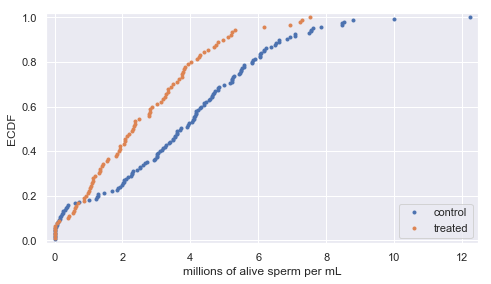

In [63]:
# EDA 

# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.8, wspace=0.6, hspace=0.4)
plt.show()

# The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm.
# Let's now do a hypothesis test

In [64]:
# Null hypothesis: "**On average**, male bees treated with neonicotinoid insecticide have the same number of active sperm
#     per milliliter of semen than do untreated male bees
# test statistic: "difference between means"

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data))) 

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for i in range(size)])


# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted, np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) / len(bs_replicates)
print('p-value =', p)

print("não existe evidência estatística suficiente (quase nula) para afirmar que o neonicotinoid não tem efeito.")

p-value = 0.0
não existe evidência estatística suficiente (quase nula) para afirmar que o neonicotinoid não tem efeito.


# Chapter 5 - Case study

#### Exercício 1 - Finch beaks and the need for statistics

In [65]:
#vídeo

In [66]:
# data 
#1975
df_1975 = pd.read_csv(data_folder + "finch_beaks_1975.csv")
df_1975.rename(columns={'Beak length, mm': 'beak_length', 'Beak depth, mm': 'beak_depth'}, inplace=True)
df_1975.insert(loc=4, column='year', value=1975)
#2012
df_2012 = pd.read_csv(data_folder + "finch_beaks_2012.csv")
df_2012.rename(columns={'blength': 'beak_length', 'bdepth': 'beak_depth'}, inplace=True)
df_2012.insert(loc=4, column='year', value=2012)

#concatenate
df = pd.concat([df_1975, df_2012])

# scandens species
df_scandens = df[df['species'] == 'scandens']

Exercício 2

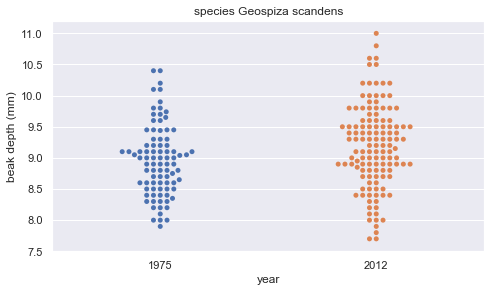

In [67]:
# EDA of beak depths of species Geospiza scandens

# How did the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza ***scandens*** 
# has changed over time?

# swarmplot
sns.swarmplot('year', 'beak_depth', data=df_scandens)

# Label the axes
plt.xlabel('year')
plt.ylabel('beak depth (mm)')
plt.title("species Geospiza scandens")

plt.subplots_adjust(left=0, bottom=0, right=1, top=0.8, wspace=0.6, hspace=0.4)
plt.show()

# It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. 
# Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a 
# bigger variance.

Exercício 3

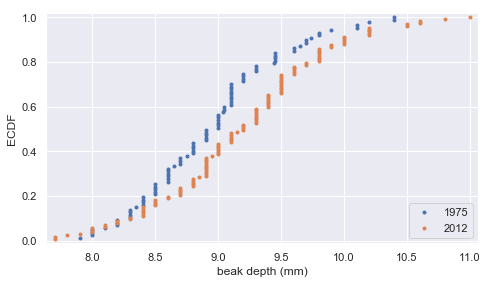

In [68]:
# ECDFs of beak depths

# While bee swarm plots are useful, ECDFs are often even better when doing EDA.

# beak depth
bd_scandens_1975 = df_scandens[df_scandens['year'] == 1975].beak_depth
bd_scandens_2012 = df_scandens[df_scandens['year'] == 2012].beak_depth

# ECDFs
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

plt.plot(ecdf(bd_scandens_1975)[0], ecdf(bd_scandens_1975)[1], marker='.', linestyle='none')
plt.plot(ecdf(bd_scandens_2012)[0], ecdf(bd_scandens_2012)[1], marker='.', linestyle='none')

# formatting
plt.margins(0.02)
plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='lower right')

plt.subplots_adjust(left=0, bottom=0, right=1, top=0.8, wspace=0.6, hspace=0.4)
plt.show()

# The differences are clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

Exercício 4

observed difference of means = 0.2262204724409429 mm
95% confidence interval = [0.06194902 0.392351  ] mm

we can confidently sat that the beaks have gotten deeper


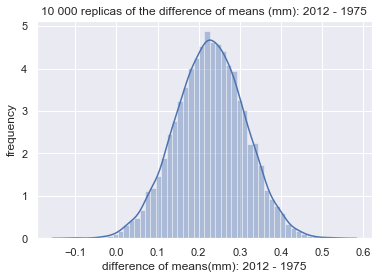

In [69]:
# Parameter estimates of beak depths, for the G. scandens samples

# Estimate the *difference of the mean beak depth* from 1975 and 2012 and report a 95% confidence interval.


#functions for replications
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data))) 

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates


# replications
replications_1975 = draw_bs_reps(bd_scandens_1975, np.mean, 10000)
replications_2012 = draw_bs_reps(bd_scandens_2012, np.mean, 10000)

diff_replications = replications_2012 - replications_1975

# Confidence interval
conf_int = np.percentile(diff_replications, [2.5, 97.5])

print('observed difference of means =', np.mean(bd_scandens_2012) - np.mean(bd_scandens_1975), 'mm')
print('95% confidence interval =', conf_int, 'mm')
print("\nwe can confidently sat that the beaks have gotten deeper")

#histograma
sns.distplot(diff_replications)
plt.title("10 000 replicas of the difference of means (mm): 2012 - 1975")
plt.xlabel("difference of means(mm): 2012 - 1975")
plt.ylabel("frequency")
plt.show()

Exercício 5

In [70]:
# Hypothesis test: Are beaks deeper in 2012? (for the scandens samples)

# Is it possible that this effect is just due to random chance? In other words, what is the probability that we would 
# get the observed difference in mean beak depth if the means were the same?

###############################################################################################

# Be careful. The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could 
# use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the
# two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

############################################################################################

# Null hypothesis: "the means of the beak depth are the same in 1075 and 2012"
# test statistic: "difference between the means"


# observed difference of means
mean_diff = np.mean(bd_scandens_2012) - np.mean(bd_scandens_1975)  #0.2262204724409429

# general mean
general_mean = np.mean(np.concatenate((bd_scandens_2012, bd_scandens_1975))) #9.094252336448598

# shifted arrays
bd_scandens_2012_shifted = bd_scandens_2012 - np.mean(bd_scandens_2012) + general_mean
bd_scandens_1975_shifted = bd_scandens_1975 - np.mean(bd_scandens_1975) + general_mean

# differences simulations
replicas_2012 = draw_bs_reps(bd_scandens_2012_shifted, np.mean, 10000)
replicas_1975 = draw_bs_reps(bd_scandens_1975_shifted, np.mean, 10000)
total_replicas = replicas_2012 - replicas_1975

# p-value
p_value = np.sum(total_replicas >= mean_diff) / len(total_replicas)
print("p-value:", p_value)

print("Não existe evidência estatística suficiente para concluir que a diferença de médias não se alterou - Rejeitamos Ho")

print("""\nWe get a p-value of 0.0034, which suggests that there is a statistically significant difference between the means.
But remember: it is very important to know how different they are. In the previous exercise, you got a difference of 0.2 mm
between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial
by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.""")

p-value: 0.0034
Não existe evidência estatística suficiente para concluir que a diferença de médias não se alterou - Rejeitamos Ho

We get a p-value of 0.0034, which suggests that there is a statistically significant difference between the means.
But remember: it is very important to know how different they are. In the previous exercise, you got a difference of 0.2 mm
between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial
by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.


#### Exercício 6 - Variation of beak shapes

In [71]:
#vídeo

# why did the mean beak depth changed in 37 years? 
# was it do to the drought of winter 1976/77 where the small seeds diminished significantly and made the beacks deeper?
# it suggests the length of the beak might change over time as well. 
# If they both change at the same rate, they both have the same shape, it just got bigger.

# How did the geometry changed?

Exercício 7

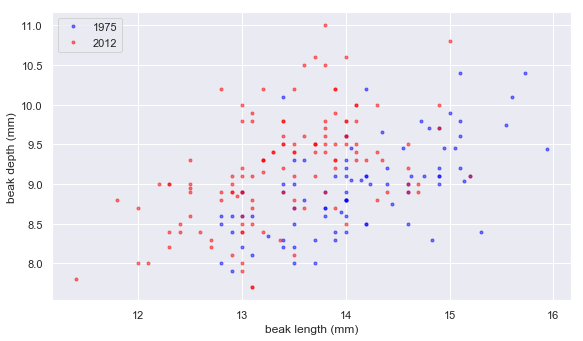

In [72]:
# EDA of beak length and depth

########################################################################################

# beak depth
bd_scandens_1975 = df_scandens[df_scandens['year'] == 1975].beak_depth
bd_scandens_2012 = df_scandens[df_scandens['year'] == 2012].beak_depth

# beak length
bl_scandens_1975 = df_scandens[df_scandens['year'] == 1975].beak_length
bl_scandens_2012 = df_scandens[df_scandens['year'] == 2012].beak_length

##########################################################################################

# Make scatter plot of 1975 data
plt.plot(bl_scandens_1975, bd_scandens_1975, marker='.', linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
plt.plot(bl_scandens_2012, bd_scandens_2012, marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=0.8, wspace=0.6, hspace=0.4)
plt.show()

# Great work. In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), 
# but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it
# does not look like the beaks kept the same shape; they became shorter and deeper.

Exercício 8

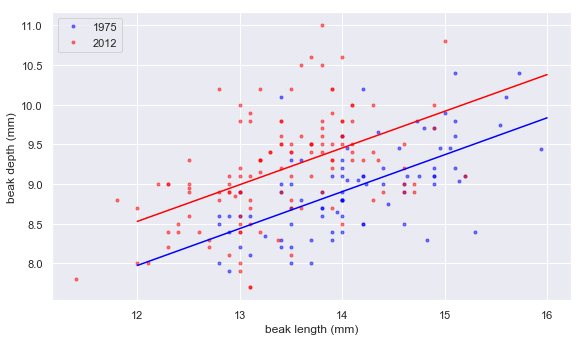

In [73]:
# Linear regressions

# 1) Perform a linear regression for both the 1975 and 2012 data. 
# 2) Then, perform pairs bootstrap estimates for the regression parameters. 
# 3) Report 95% confidence intervals on the slope and intercept of the regression line.


# 1) Perform a linear regression for both the 1975 and 2012 data.

slope_1975, intercept_1975 = np.polyfit(bl_scandens_1975, bd_scandens_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_scandens_2012, bd_scandens_2012, 1)


############################################################################################ graficamente:
#scatter plots
plt.plot(bl_scandens_1975, bd_scandens_1975, marker='.', linestyle='none', color='blue', alpha=0.5)
plt.plot(bl_scandens_2012, bd_scandens_2012, marker='.', linestyle='none', color='red', alpha=0.5)
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# linear regressions
x_1975 = np.array([12, 16])
y_1975 = slope_1975 * x_1975 + intercept_1975
x_2012 = np.array([12, 16])
y_2012 = slope_2012 * x_2012 + intercept_2012
plt.plot(x_1975, y_1975, color='blue')
plt.plot(x_2012, y_2012, color='red')

plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=0.8, wspace=0.6, hspace=0.4)
plt.show()

In [74]:
# 2) Then, perform pairs bootstrap estimates for the regression parameters.

##########################################################################################

# linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_scandens_1975, bd_scandens_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_scandens_2012, bd_scandens_2012, 1)

#########################################################################################
# A function to do pairs bootstrap on a set of x,y data.
def draw_bs_pairs_linreg(x, y, size=1):
    indices = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_indices = np.random.choice(indices, size=len(indices))
        bs_x, bs_y = x[bs_indices], y[bs_indices]            # se quisesse ler nas series, e não arrays, punha x.iloc[]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

########################################################################################

#1975
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(np.array(bl_scandens_1975), np.array(bd_scandens_1975), size=1000)

#2012
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(np.array(bl_scandens_2012), np.array(bd_scandens_2012), size=1000)


# 3) Report 95% confidence intervals on the slope and intercept of the regression line.

# 1975
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])

# 2012
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975, 'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975, 'conf int =', intercept_conf_int_1975)
print('\n2012: slope =', slope_2012, 'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012, 'conf int =', intercept_conf_int_2012)


# It looks like they have the same slope, but different intercepts.

1975: slope = 0.46520516916059357 conf int = [0.33211333 0.59345772]
1975: intercept = 2.3908752365842285 conf int = [0.59104259 4.23058155]

2012: slope = 0.4626303588353126 conf int = [0.3345886  0.60026964]
2012: intercept = 2.9772474982360184 conf int = [1.14162078 4.67839748]


Exercício 9

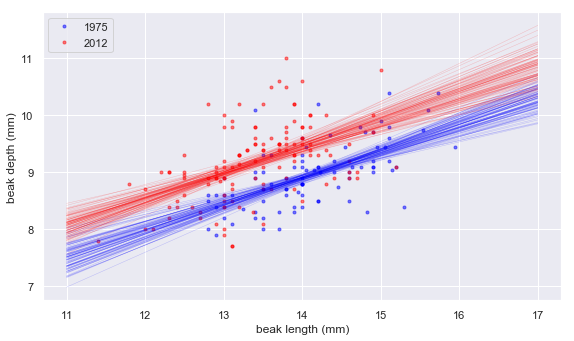

In [75]:
# Displaying the linear regression results

# scatter plots 
plt.plot(bl_scandens_1975, bd_scandens_1975, marker='.', linestyle='none', color='blue', alpha=0.5)
plt.plot(bl_scandens_2012, bd_scandens_2012, marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([11, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i], linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i], linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=0.8, wspace=0.6, hspace=0.4)
plt.show()

Exercício 10

In [76]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data))) 

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

In [77]:
# Beak length to depth ratio

# The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, 
# suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both 
# years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth.
# Let's make that comparison.

# Compute length-to-depth ratios
ratio_1975 = bl_scandens_1975/bd_scandens_1975
ratio_2012 = bl_scandens_2012/bd_scandens_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate 10000 bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975, '; 99% confidence interval for the mean ratio =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012, '; 99% confidence interval for the mean ratio =', conf_int_2012)

# next: interpretation of the results

1975: mean ratio = 1.5788823771858533 ; 99% confidence interval for the mean ratio = [1.55636296 1.60142347]
2012: mean ratio = 1.4658342276847778 ; 99% confidence interval for the mean ratio = [1.44401964 1.48749302]


Exercício 11

In [78]:
# How different is the ratio?

# The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are
# not even close to overlapping, so this is a real change. The beak shape changed.

#### Exercício 12 - Calculation of heritability

In [79]:
#vídeo

# o que causa a evolução dos bicos do pássaro da espécie scandens?
# uma das hipóteses é a interação com outra espécie

#Heredity
# The tendency for parental traits to be inherited by offspring (how strong is it?)

In [80]:
# data


# The array bd_parent_scandens contains the **average beak depth** (in mm) of two parents of the species G. scandens.
bd_parent_scandens = np.array([8.3318, 8.4035, 8.5317, 8.7202, 8.7089, 8.7541, 8.773, 8.8107, 8.7919, 8.8069, 8.6523, 8.6146, 8.6938, 8.7127, 8.7466, 8.7504, 8.7805, 8.7428, 8.7164, 8.8032, 8.8258, 8.856, 8.9012, 8.9125, 8.8635, 8.8258, 8.8522, 8.8974, 8.9427, 8.9879, 8.9615, 8.9238, 8.9351, 9.0143, 9.0558, 9.0596, 8.9917, 8.905, 8.9314, 8.9465, 8.9879, 8.9804, 9.0219, 9.052, 9.0407, 9.0407, 8.9955, 8.9992, 8.9992, 9.0747, 9.0747, 9.5385, 9.4781, 9.4517, 9.3537, 9.2707, 9.1199, 9.1689, 9.1425, 9.135, 9.1011, 9.1727, 9.2217, 9.2255, 9.2821, 9.3235, 9.3198, 9.3198, 9.3198, 9.3273, 9.3725, 9.3989, 9.4253, 9.4593, 9.4442, 9.4291, 9.2632, 9.2293, 9.1878, 9.1425, 9.1275, 9.1802, 9.1765, 9.2481, 9.2481, 9.1991, 9.1689, 9.1765, 9.2406, 9.3198, 9.3235, 9.1991, 9.2971, 9.2443, 9.316, 9.2934, 9.3914, 9.3989, 9.5121, 9.6176, 9.5535, 9.4668, 9.3725, 9.3348, 9.3763, 9.3839, 9.4216, 9.4065, 9.3348, 9.4442, 9.4367, 9.5083, 9.448, 9.4781, 9.595, 9.6101, 9.5686, 9.6365, 9.7119, 9.8213, 9.825, 9.7609, 9.6516, 9.5988, 9.546, 9.6516, 9.7572, 9.8854, 10.0023, 9.3914])

# The array bd_offspring_scandens contains the **average beak depth** of the offspring of the respective parents.
bd_offspring_scandens = np.array([8.419, 9.2468, 8.1532, 8.0089, 8.2215, 8.3734, 8.5025, 8.6392, 8.7684, 8.8139, 8.7911, 8.9051, 8.9203, 8.8747, 8.943, 9.0038, 8.981, 9.0949, 9.2696, 9.1633, 9.1785, 9.1937, 9.2772, 9.0722, 8.9658, 8.9658, 8.5025, 8.4949, 8.4949, 8.5633, 8.6013, 8.6468, 8.1532, 8.3734, 8.662, 8.6924, 8.7456, 8.8367, 8.8595, 8.9658, 8.9582, 8.8671, 8.8671, 8.943, 9.0646, 9.1405, 9.2089, 9.2848, 9.3759, 9.4899, 9.4519, 8.1228, 8.2595, 8.3127, 8.4949, 8.6013, 8.4646, 8.5329, 8.7532, 8.8823, 9.0342, 8.6392, 8.6772, 8.6316, 8.7532, 8.8291, 8.8975, 8.9734, 9.0494, 9.1253, 9.1253, 9.1253, 9.1785, 9.2848, 9.4595, 9.3608, 9.2089, 9.2544, 9.3684, 9.3684, 9.2316, 9.1709, 9.2316, 9.0342, 8.8899, 8.8291, 8.981, 8.8975, 10.4089, 10.1886, 9.7633, 9.7329, 9.6114, 9.5051, 9.5127, 9.3684, 9.6266, 9.5354, 10.0215, 10.0215, 9.6266, 9.6038, 9.4063, 9.2316, 9.338, 9.262, 9.262, 9.4063, 9.4367, 9.0342, 8.943, 8.9203, 8.7835, 8.7835, 9.057, 8.9354, 8.8975, 8.8139, 8.8671, 9.0873, 9.2848, 9.2392, 9.2924, 9.4063, 9.3152, 9.4899, 9.5962, 9.6873, 9.5203, 9.6646])

# The arrays bd_parent_fortis and bd_offspring_fortis contain the same information about measurements from G. fortis birds.
bd_parent_fortis = np.array([10.1, 9.55, 9.4, 10.25, 10.125, 9.7, 9.05, 7.4, 9., 8.65, 9.625, 9.9, 9.55, 9.05, 8.35, 10.1, 10.1, 9.9, 10.225, 10., 10.55, 10.45, 9.2, 10.2, 8.95, 10.05, 10.2, 9.5, 9.925, 9.95, 10.05, 8.75, 9.2, 10.15, 9.8, 10.7, 10.5, 9.55, 10.55, 10.475, 8.65, 10.7, 9.1, 9.4, 10.3, 9.65, 9.5, 9.7, 10.525, 9.95, 10.1, 9.75, 10.05, 9.9, 10., 9.1, 9.45, 9.25, 9.5, 10., 10.525, 9.9, 10.4, 8.95, 9.4, 10.95, 10.75, 10.1, 8.05, 9.1, 9.55, 9.05, 10.2, 10., 10.55, 10.75, 8.175, 9.7, 8.8, 10.75, 9.3, 9.7, 9.6, 9.75, 9.6, 10.45, 11., 10.85, 10.15, 10.35, 10.4, 9.95, 9.1, 10.1, 9.85, 9.625, 9.475, 9., 9.25, 9.1, 9.25, 9.2, 9.95, 8.65, 9.8, 9.4, 9., 8.55, 8.75, 9.65, 8.95, 9.15, 9.85, 10.225, 9.825, 10., 9.425, 10.4, 9.875, 8.95, 8.9, 9.35, 10.425, 10., 10.175, 9.875, 9.875, 9.15, 9.45, 9.025, 9.7, 9.7, 10.05, 10.3, 9.6, 10., 9.8, 10.05, 8.75, 10.55, 9.7, 10., 9.85, 9.8, 9.175, 9.65, 9.55, 9.9, 11.55, 11.3, 10.4, 10.8, 9.8, 10.45, 10., 10.75, 9.35, 10.75, 9.175, 9.65, 8.8, 10.55, 10.675, 9.95, 9.55, 8.825, 9.7, 9.85, 9.8, 9.55, 9.275, 10.325, 9.15, 9.35, 9.15, 9.65, 10.575, 9.975, 9.55, 9.2, 9.925, 9.2, 9.3, 8.775, 9.325, 9.175, 9.325, 8.975, 9.7, 9.5, 10.225, 10.025, 8.2, 8.2, 9.55, 9.05, 9.6, 9.6, 10.15, 9.875, 10.485, 11.485, 10.985, 9.7, 9.65, 9.35, 10.05, 10.1, 9.9, 8.95, 9.3, 9.95, 9.45, 9.5, 8.45, 8.8, 8.525, 9.375, 10.2, 7.625, 8.375, 9.25, 9.4, 10.55, 8.9, 8.8, 9., 8.575, 8.575, 9.6, 9.375, 9.6, 9.95, 9.6, 10.2, 9.85, 9.625, 9.025, 10.375, 10.25, 9.3, 9.5, 9.55, 8.55, 9.05, 9.9, 9.8, 9.75, 10.25, 9.1, 9.65, 10.3, 8.9, 9.95, 9.5, 9.775, 9.425, 7.75, 7.55, 9.1, 9.6, 9.575, 8.95, 9.65, 9.65, 9.65, 9.525, 9.85, 9.05, 9.3, 8.9, 9.45, 10., 9.85, 9.25, 10.1, 9.125, 9.65, 9.1, 8.05, 7.4, 8.85, 9.075, 9., 9.7, 8.7, 9.45, 9.7, 8.35, 8.85, 9.7, 9.45, 10.3, 10., 10.45, 9.45, 8.5, 8.3, 10., 9.225, 9.75, 9.15, 9.55, 9., 9.275, 9.35, 8.95, 9.875, 8.45, 8.6, 9.7, 8.55, 9.05, 9.6, 8.65, 9.2, 8.95, 9.6, 9.15, 9.4, 8.95, 9.95, 10.55, 9.7, 8.85, 8.8, 10., 9.05, 8.2, 8.1, 7.25, 8.3, 9.15, 8.6, 9.5, 8.05, 9.425, 9.3, 9.8, 9.3, 9.85, 9.5, 8.65, 9.825, 9., 10.45, 9.1, 9.55, 9.05, 10., 9.35, 8.375, 8.3, 8.8, 10.1, 9.5, 9.75, 10.1, 9.575, 9.425, 9.65, 8.725, 9.025, 8.5, 8.95, 9.3, 8.85, 8.95, 9.8, 9.5, 8.65, 9.1, 9.4, 8.475, 9.35, 7.95, 9.35, 8.575, 9.05, 8.175, 9.85, 7.85, 9.85, 10.1, 9.35, 8.85, 8.75, 9.625, 9.25, 9.55, 10.325, 8.55, 9.675, 9.15, 9., 9.65, 8.6, 8.8, 9., 9.95, 8.4, 9.35, 10.3, 9.05, 9.975, 9.975, 8.65, 8.725, 8.2, 7.85, 8.775, 8.5, 9.4])
bd_offspring_fortis = np.array([10.7, 9.78, 9.48, 9.6, 10.27, 9.5, 9., 7.46, 7.65, 8.63, 9.81, 9.4, 9.48, 8.75, 7.6, 10., 10.09, 9.74, 9.64, 8.49, 10.15, 10.28, 9.2, 10.01, 9.03, 9.94, 10.5, 9.7, 10.02, 10.04, 9.43, 8.1, 9.5, 9.9, 9.48, 10.18, 10.16, 9.08, 10.39, 9.9, 8.4, 10.6, 8.75, 9.46, 9.6, 9.6, 9.95, 10.05, 10.16, 10.1, 9.83, 9.46, 9.7, 9.82, 10.34, 8.02, 9.65, 9.87, 9., 11.14, 9.25, 8.14, 10.23, 8.7, 9.8, 10.54, 11.19, 9.85, 8.1, 9.3, 9.34, 9.19, 9.52, 9.36, 8.8, 8.6, 8., 8.5, 8.3, 10.38, 8.54, 8.94, 10., 9.76, 9.45, 9.89, 10.9, 9.91, 9.39, 9.86, 9.74, 9.9, 9.09, 9.69, 10.24, 8.9, 9.67, 8.93, 9.3, 8.67, 9.15, 9.23, 9.59, 9.03, 9.58, 8.97, 8.57, 8.47, 8.71, 9.21, 9.13, 8.5, 9.58, 9.21, 9.6, 9.32, 8.7, 10.46, 9.29, 9.24, 9.45, 9.35, 10.19, 9.91, 9.18, 9.89, 9.6, 10.3, 9.45, 8.79, 9.2, 8.8, 9.69, 10.61, 9.6, 9.9, 9.26, 10.2, 8.79, 9.28, 8.83, 9.76, 10.2, 9.43, 9.4, 9.9, 9.5, 8.95, 9.98, 9.72, 9.86, 11.1, 9.14, 10.49, 9.75, 10.35, 9.73, 9.83, 8.69, 9.58, 8.42, 9.25, 10.12, 9.31, 9.99, 8.59, 8.74, 8.79, 9.6, 9.52, 8.93, 10.23, 9.35, 9.35, 9.09, 9.04, 9.75, 10.5, 9.09, 9.05, 9.54, 9.3, 9.06, 8.7, 9.32, 8.4, 8.67, 8.6, 9.53, 9.77, 9.65, 9.43, 8.35, 8.26, 9.5, 8.6, 9.57, 9.14, 10.79, 8.91, 9.93, 10.7, 9.3, 9.93, 9.51, 9.44, 10.05, 10.13, 9.24, 8.21, 8.9, 9.34, 8.77, 9.4, 8.82, 8.83, 8.6, 9.5, 10.2, 8.09, 9.07, 9.29, 9.1, 10.19, 9.25, 8.98, 9.02, 8.6, 8.25, 8.7, 9.9, 9.65, 9.45, 9.38, 10.4, 9.96, 9.46, 8.26, 10.05, 8.92, 9.5, 9.43, 8.97, 8.44, 8.92, 10.3, 8.4, 9.37, 9.91, 10., 9.21, 9.95, 8.84, 9.82, 9.5, 10.29, 8.4, 8.31, 9.29, 8.86, 9.4, 9.62, 8.62, 8.3, 9.8, 8.48, 9.61, 9.5, 9.37, 8.74, 9.31, 9.5, 9.49, 9.74, 9.2, 9.24, 9.7, 9.64, 9.2, 7.5, 7.5, 8.7, 8.31, 9., 9.74, 9.31, 10.5, 9.3, 8.12, 9.34, 9.72, 9., 9.65, 9.9, 10., 10.1, 8., 9.07, 9.75, 9.33, 8.11, 9.36, 9.74, 9.9, 9.23, 9.7, 8.2, 9.35, 9.49, 9.34, 8.87, 9.03, 9.07, 9.43, 8.2, 9.19, 9., 9.2, 9.06, 9.81, 8.89, 9.4, 10.45, 9.64, 9.03, 8.71, 9.91, 8.33, 8.2, 7.83, 7.14, 8.91, 9.18, 8.8, 9.9, 7.73, 9.25, 8.7, 9.5, 9.3, 9.05, 10.18, 8.85, 9.24, 9.15, 9.98, 8.77, 9.8, 8.65, 10., 8.81, 8.01, 7.9, 9.41, 10.18, 9.55, 9.08, 8.4, 9.75, 8.9, 9.07, 9.35, 8.9, 8.19, 8.65, 9.19, 8.9, 9.28, 10.58, 9., 9.4, 8.91, 9.93, 10., 9.37, 7.4, 9., 8.8, 9.18, 8.3, 10.08, 7.9, 9.96, 10.4, 9.65, 8.8, 8.65, 9.7, 9.23, 9.43, 9.93, 8.47, 9.55, 9.28, 8.85, 8.9, 8.75, 8.63, 9., 9.43, 8.28, 9.23, 10.4, 9., 9.8, 9.77, 8.97, 8.37, 7.7, 7.9, 9.5, 8.2, 8.8])


Exercício 13

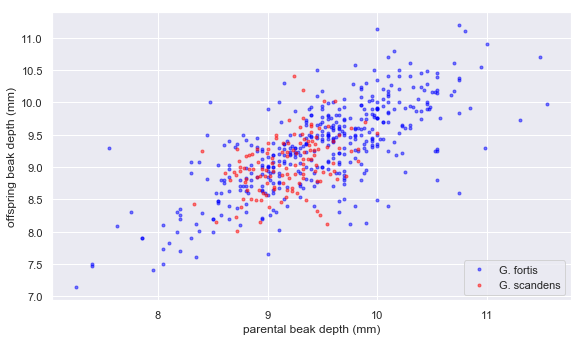

It appears that there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak 
depth is more strongly inherited in G. fortis.

Correlation coefficient in G. fortis: 0.7283412395518486
Correlation coefficient in G. scandens: 0.41170636294012586


In [81]:
# EDA of heritability

# scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis), for both species. 
plt.plot(bd_parent_fortis, bd_offspring_fortis, marker='.', linestyle='none', color='blue', alpha=0.5)
plt.plot(bd_parent_scandens, bd_offspring_scandens, marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
plt.xlabel('parental beak depth (mm)')
plt.ylabel('offspring beak depth (mm)')

# Add legend
plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

#plot
plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=0.8, wspace=0.6, hspace=0.4)
plt.show()

print("""It appears that there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak 
depth is more strongly inherited in G. fortis.""")

print("\nCorrelation coefficient in G. fortis:", np.corrcoef(bd_parent_fortis, bd_offspring_fortis)[0, 1])
print("Correlation coefficient in G. scandens:", np.corrcoef(bd_parent_scandens, bd_offspring_scandens)[0, 1])

Exercício 14

In [82]:
# Correlation of offspring and parental data

# In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, 
# such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we
# need to do a pairs bootstrap.

# You have already written a function to do pairs bootstrap to get estimates for parameters derived from linear regression.
# Your task in this exercise is to make a new function with call signature draw_bs_pairs(x, y, func, size=1) that performs
# **pairs bootstrap** and computes a *single statistic* on pairs samples defined. The statistic of interested in computed 
# by calling func(bs_x, bs_y). In the next exercise, you will use pearson_r for func.

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""
    # indices to sample from
    indices = np.arange(len(x))
    
    # iniciate replicates
    bs_replicates = np.empty(size)
    
    # generate replicates
    for i in range(size):
        bs_indices = np.random.choice(indices, size=len(indices))
        bs_x, bs_y = x[bs_indices], y[bs_indices]
        bs_replicates[i] = func(bs_x, bs_y)
    
    return bs_replicates


Exercício 15

In [83]:
# Pearson correlation of offspring and parental data

def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

# observed correlation coefficients
corr_coef_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
corr_coef_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)


# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', corr_coef_scandens, conf_int_scandens)
print('G. fortis:', corr_coef_fortis, conf_int_fortis) 

print("""\nIt is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly
correlated with their offspring than their G. scandens counterparts.""")

G. scandens: 0.41170636294012586 [0.26672763 0.54478456]
G. fortis: 0.7283412395518486 [0.67341989 0.77908707]

It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly
correlated with their offspring than their G. scandens counterparts.


Exercício 16

In [84]:
# Measuring heritability

#   Remember that the Pearson correlation coefficient is the ratio of the covariance to the **geometric mean** of the 
# variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the
# best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the 
# covariance between parent and offspring ***to the variance of the parents*** alone. In this exercise, you will estimate 
# the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

#   This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a 
# plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and 
# analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability
# is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)


# Here again, we see that G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis
# may be strongly incorporated into G. scandens by introgressive hybridization.

G. scandens: 0.5485340868685983 [0.33902241 0.75919102]
G. fortis: 0.7229051911438156 [0.65142974 0.7988428 ]


Exercício 17

p-value = 0.0
You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a 
heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. 
scandens, just not as much as in G. fortis. If you like, you can plot a histogram of the heritability replicates to get 
a feel for how extreme of a value of heritability you might expect by chance.


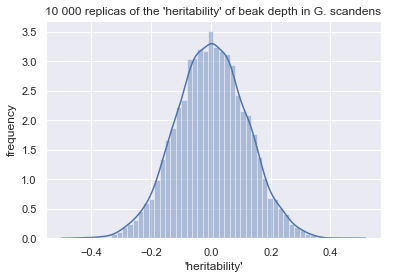

In [85]:
# Is beak depth heritable at all in G. scandens?

# The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved 
# by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this,
# you will do a **pairs permutation test**.

# Null hypothesis: "beak depth is not heritable in the scandens species"
# test statistic: "heritability()"

# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-value =', p)

print("""You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a 
heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. 
scandens, just not as much as in G. fortis. If you like, you can plot a histogram of the heritability replicates to get 
a feel for how extreme of a value of heritability you might expect by chance.""")


#histograma
sns.distplot(perm_replicates)
plt.title("10 000 replicas of the 'heritability' of beak depth in G. scandens")
plt.xlabel("'heritability'")
plt.ylabel("frequency")
plt.show()

#### Exercício 18 - final thoughts

In [86]:
#vídeo

# Fim